In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive

$$
\large
sh(x)=\frac{e^{x}-e^{-x}}{2}    \\
\large
ch(x)=\frac{e^{x}+e^{-x}}{2}    \\
\large
th(x)=\frac{e^{x}-e^{-x}}{e^{x}-e^{-x}}
$$

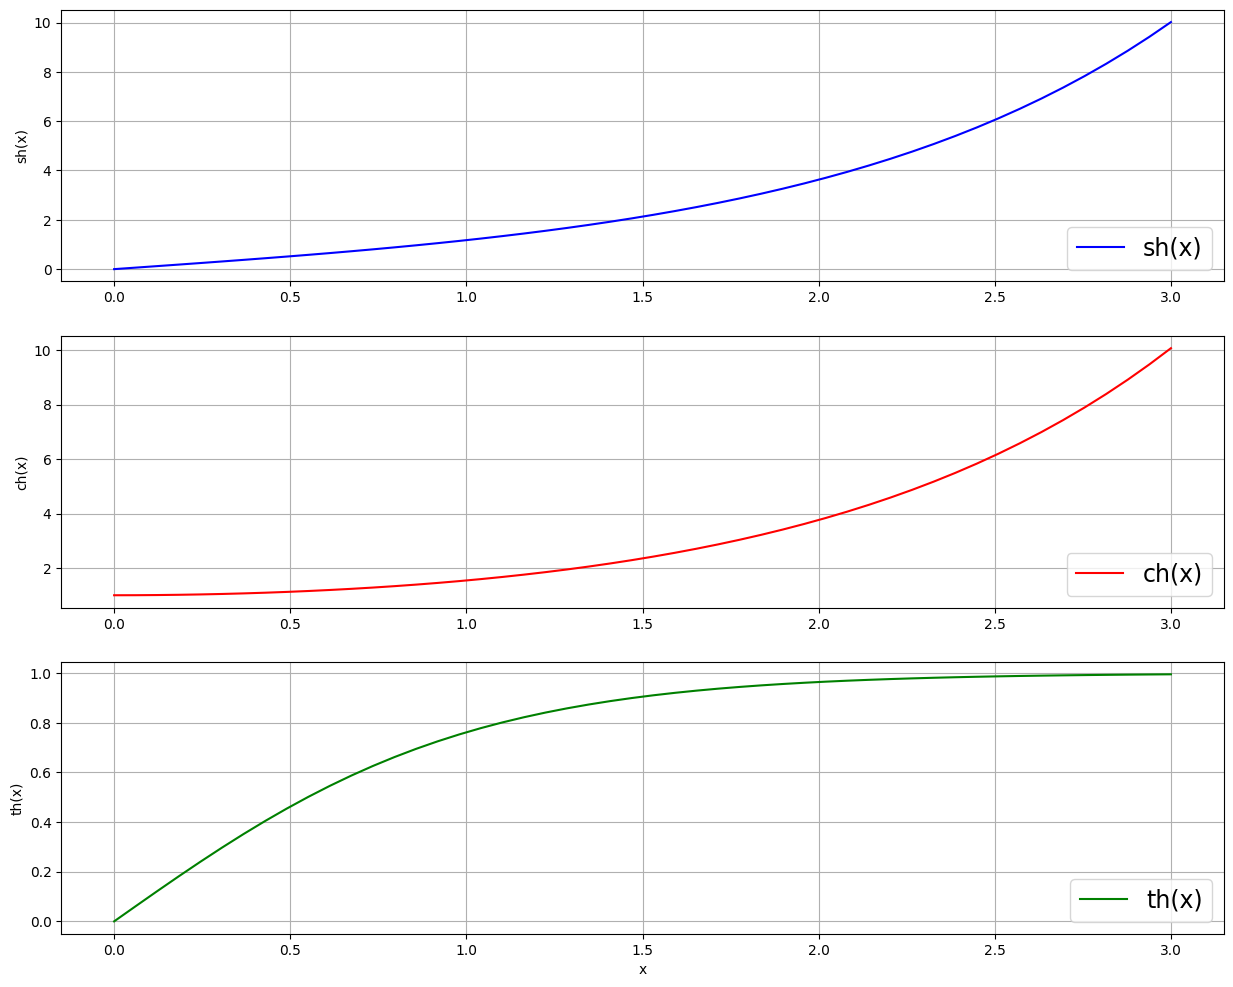

In [3]:
x=np.linspace(0,3,50)
sh=np.sinh(x)
ch=np.cosh(x)
th=np.tanh(x)
fig, axs = plt.subplots(3,1,figsize=(15,12))
axs[0].plot(x, sh,color="blue",label='sh(x)')
axs[0].legend(loc='lower right',fontsize = 17)
axs[0].set_ylabel('sh(x)')
axs[0].grid(visible=True)
axs[1].plot(x, ch,color="red",label='ch(x)')
axs[1].set_ylabel('ch(x)')
axs[1].legend(loc='lower right',fontsize = 17)
axs[1].grid(visible=True)
axs[2].plot(x, th,color="green",label='th(x)')
axs[2].set_ylabel('th(x)')
axs[2].set_xlabel('x')
axs[2].legend(loc='lower right',fontsize = 17)
axs[2].grid(visible=True)

### 过余温度
$$
\large
\frac{\theta}{\theta_0}=\frac{ch[m(x-H)]}{ch[mH]}=\frac{ch[mH(\frac{x}{H}-1)]}{ch[mH]}
$$

In [5]:
def theta(mH):
    xdH = np.linspace(0, 1, num=50)
    ax=plt.plot(xdH, np.cosh(mH*(xdH-1))/np.cosh(mH),color="black",label=f"mH={mH}")
    plt.legend()
    
    plt.xlabel('x/H')
    plt.ylabel('theta/theta_0')
    plt.ylim(0, 1)
    

    plt.grid(visible=True)
    plt.show()
interactive_plot = interactive(theta, mH=(0, 10.0))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=5.0, description='mH', max=10.0), Output()), _dom_classes=('widget-int…

### 肋端过余温度
$$
\large
\frac{\theta_H}{\theta_0}=\frac{1}{ch[mH]}
$$
### 散热量
$$
\large
q=\sqrt{hU\lambda A}\theta_0 th(mH)
$$

Text(0, 0.5, 'th(mH),1/ch(mH)')

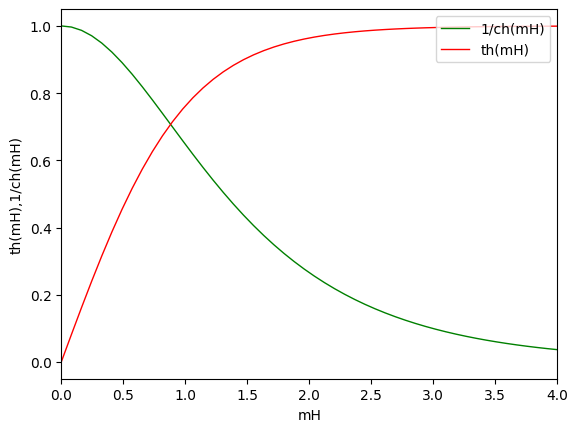

In [6]:
x=np.linspace(1e-4,4,50)
y_q,y_T=np.tanh(x),1.0/np.cosh(x)
plt.plot(x,y_T,color="green", linewidth=1.0, linestyle="-",label='1/ch(mH)')
plt.plot(x,y_q,color="red", linewidth=1.0, linestyle="-",label='th(mH)')
plt.xlim(0,4.0)
plt.legend(loc='upper right')
plt.xlabel('mH')
plt.ylabel('th(mH),1/ch(mH)')

### 单位厚度和宽度的换热量

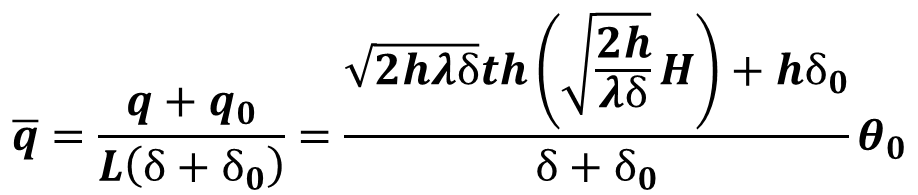

In [3]:
def q_bar(h,lamda,theta0,H_mm,delta0_mm):
    delta_mm = np.linspace(1e-2, 100, num=500)
    delta = delta_mm/1000.0
    H = H_mm/1000.0
    delta0 = delta0_mm/1000.0
    q_v= (np.sqrt(2*h*lamda*delta)*theta0*np.tanh(np.sqrt(2*h/(lamda*delta))*H)+h*delta0*theta0)/(delta+delta0)
    
    
    plt.figure(figsize=(15,12))
    ax=plt.plot(delta_mm, q_v,color="black",label=f"q_bar")
    
    plt.legend()
    plt.xscale('log')
    plt.xlabel('delta(mm)')
    plt.ylabel('q_bar')
    #plt.xticks(np.arange(delta_mm[0], delta_mm[-1], step=0.5))
    #plt.ylim(0, 1)
    plt.grid(visible=True)
    
    
    delta_q_max = np.argmax(q_v)
    show_max =f"[{delta_mm[delta_q_max]:.2f},{q_v[delta_q_max]:.2f}]"
    print(show_max)
    plt.annotate(show_max,xy=(delta_mm[delta_q_max],q_v[delta_q_max]),color='red')
    plt.show()
interactive_plot = interactive(q_bar, h=(10, 100),lamda=(50,400),theta0=(1,1),H_mm=(1,100),delta0_mm=(1,10))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=55, description='h', min=10), IntSlider(value=225, description='lamda', …

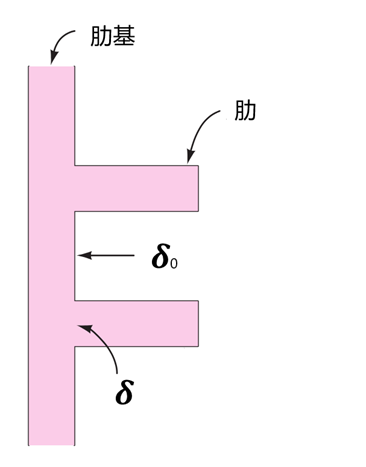